In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df['Species'] = encoder.fit_transform(df['Species'])

In [9]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,0
37,4.9,3.1,1.5,0.1,0
76,6.8,2.8,4.8,1.4,1
5,5.4,3.9,1.7,0.4,0
125,7.2,3.2,6.0,1.8,2


In [10]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [11]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

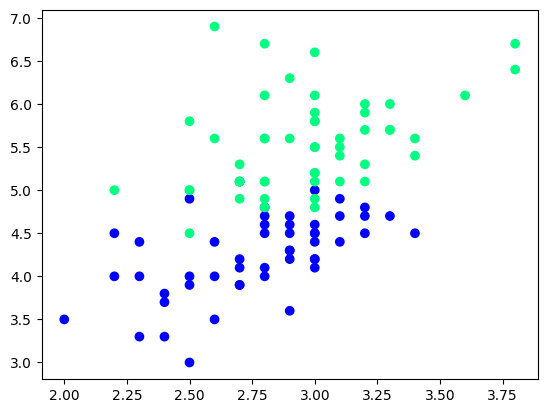

In [13]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [14]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_testing = df.iloc[80:,:].sample(5)

In [15]:
df_train

,SepalWidthCm,PetalLengthCm,Species
65,3.1,4.4,1
75,3.0,4.4,1
51,3.2,4.5,1
132,2.8,5.6,2
149,3.0,5.1,2
79,2.6,3.5,1
72,2.5,4.9,1
114,2.8,5.1,2
54,2.8,4.6,1
107,2.9,6.3,2


In [16]:
df_val

,SepalWidthCm,PetalLengthCm,Species
99,2.8,4.1,1
130,2.8,6.1,2
70,3.2,4.8,1
87,2.3,4.4,1
138,3.0,4.8,2


In [17]:
df_testing

,SepalWidthCm,PetalLengthCm,Species
56,3.3,4.7,1
136,3.4,5.6,2
134,2.6,5.6,2
106,2.5,4.5,2
127,3.0,4.9,2


In [18]:
x_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [19]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
Y = df_bag.iloc[:,-1]

In [20]:
df_bag

,SepalWidthCm,PetalLengthCm,Species
54,2.8,4.6,1
149,3.0,5.1,2
72,2.5,4.9,1
51,3.2,4.5,1
51,3.2,4.5,1
114,2.8,5.1,2
149,3.0,5.1,2
132,2.8,5.6,2


In [23]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [24]:
dt_bag1 = DecisionTreeClassifier()

In [30]:
def evaluate(clf,X,Y):
    clf.fit(X,Y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, Y.values, clf=clf, legend=2)
    y_pred = clf.predict(x_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred))

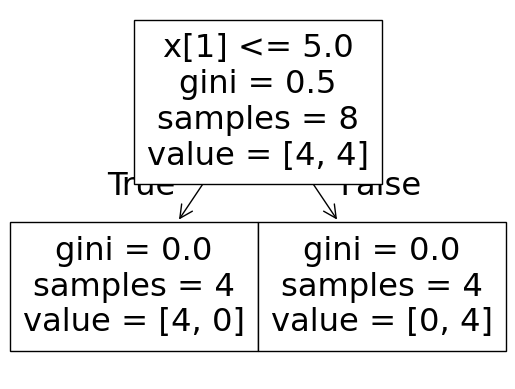

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy:  0.8


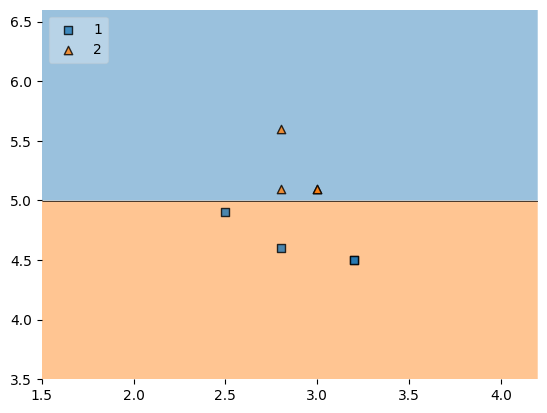

In [31]:
evaluate(dt_bag1, X , Y)

In [32]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
Y = df_bag.iloc[:,-1]

In [33]:
dt_bag2 = DecisionTreeClassifier()

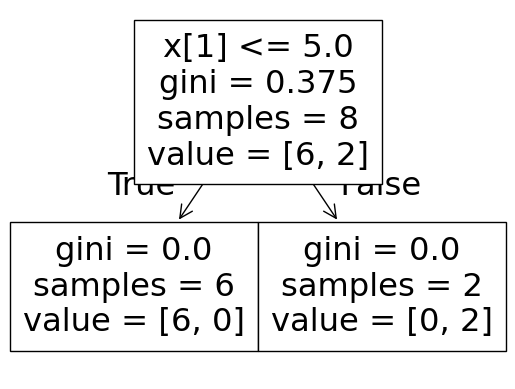

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy:  0.8


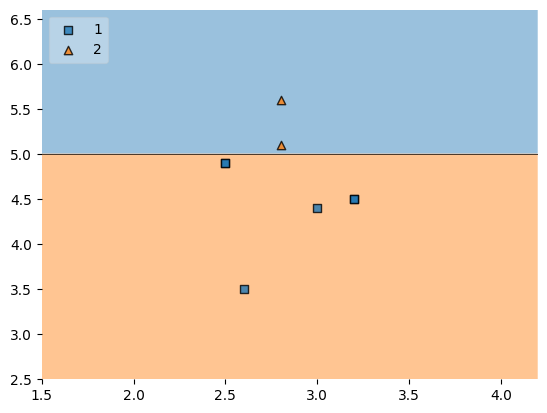

In [34]:
evaluate(dt_bag2, X , Y)

In [35]:
df_testing

,SepalWidthCm,PetalLengthCm,Species
56,3.3,4.7,1
136,3.4,5.6,2
134,2.6,5.6,2
106,2.5,4.5,2
127,3.0,4.9,2


In [40]:
dt_bag3 = DecisionTreeClassifier()

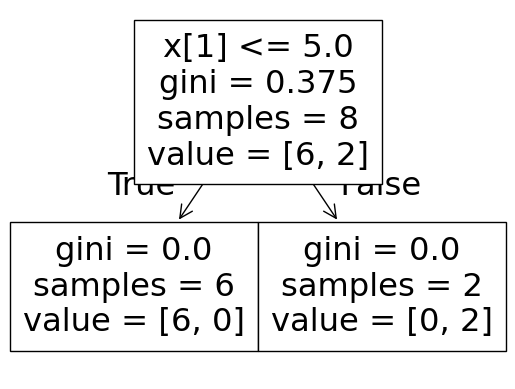

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy:  0.8


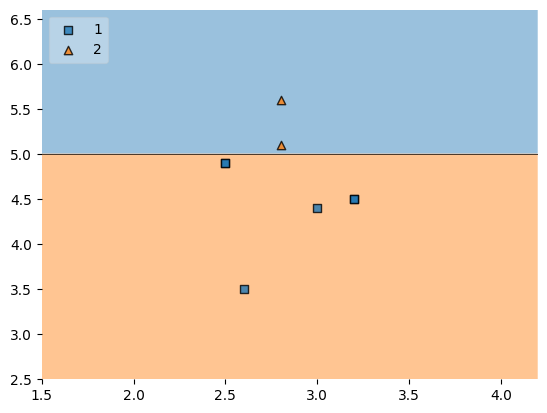

In [43]:
evaluate(dt_bag3, X, Y)

In [45]:
print("Predictior 1",dt_bag1.predict(np.array([3.4,	5.6	]).reshape(1,2)))
print("Predictior 2",dt_bag2.predict(np.array([3.4,	5.6]).reshape(1,2)))
print("Predictior 3",dt_bag3.predict(np.array([3.4,	5.6]).reshape(1,2)))

Predictior 1 [2]
Predictior 2 [2]
Predictior 3 [2]


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
